# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'magma'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

In [3]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

In [4]:
C_data = np.load(data_path+"/AvgCmatrixHC.npy")
D_data = np.load(data_path+"/AvgDmatrixHC.npy")

In [5]:
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

In [6]:
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

In [7]:
FC_data = np.load(data_path+"/AvgFmatrixHC.npy")
timeseries = np.load(data_path+"/AvgTmatrixHC.npy")

In [8]:
FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

In [9]:
wc = WCModel(Cmat = Cmat, Dmat = Dmat)

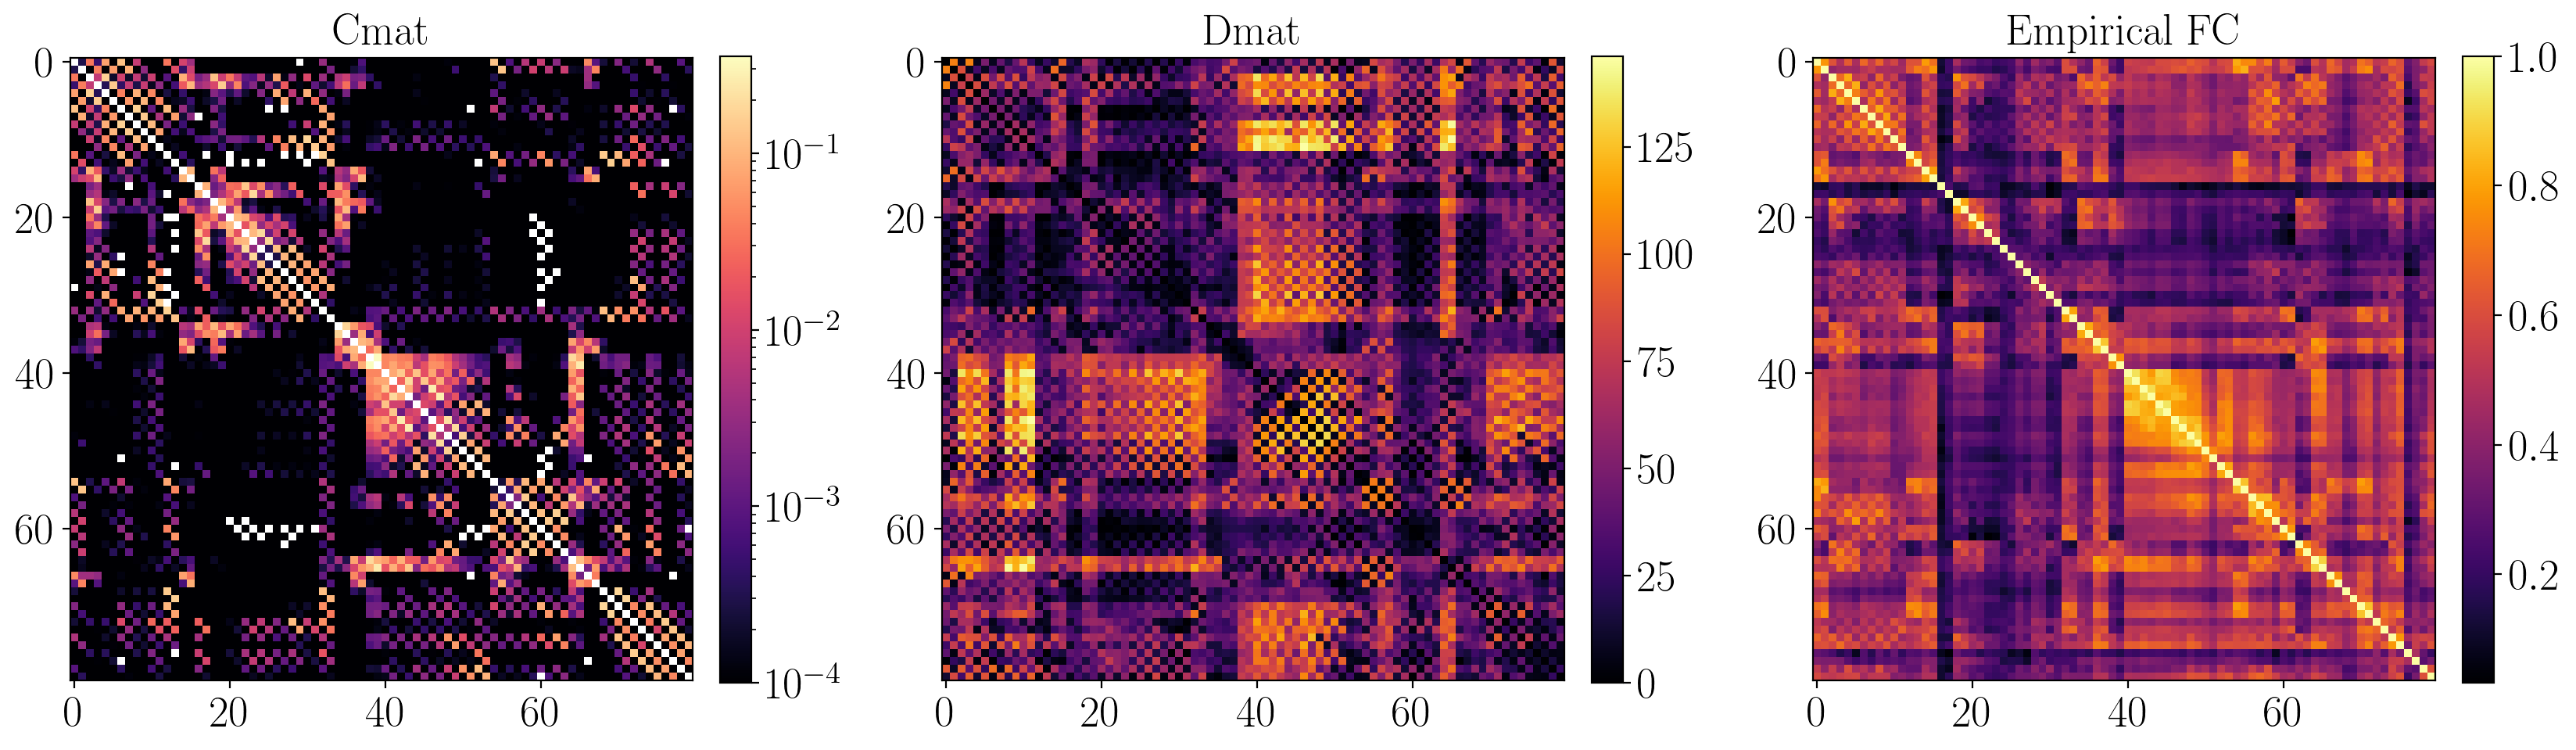

In [10]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1, 3, figsize=(20,15))
fig.subplots_adjust(wspace=0.28)


im = axs[0].imshow(wc.params['Cmat'], norm=LogNorm(vmin=10e-5, vmax=np.max(wc.params['Cmat'])))
axs[0].set_title("Cmat", fontsize = 20)
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
im = axs[1].imshow(wc.params['lengthMat'], cmap='inferno')
axs[1].set_title("Dmat", fontsize = 20)
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04)
im = axs[2].imshow(FCs, cmap='inferno')
axs[2].set_title("Empirical FC", fontsize = 20)
fig.colorbar(im, ax=axs[2],fraction=0.046, pad=0.04)

In [108]:
wc = WCModel(Cmat = Cmat, Dmat = Dmat)
wc.params['duration'] = 40*1000
wc.params['exc_ext'] = 0.45
wc.params['c_excinh'] = 10.33
wc.params['c_inhexc'] = 9.67
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 1.84
wc.params['sigma_ou'] = 4.28e-05

wc.run(bold = True)

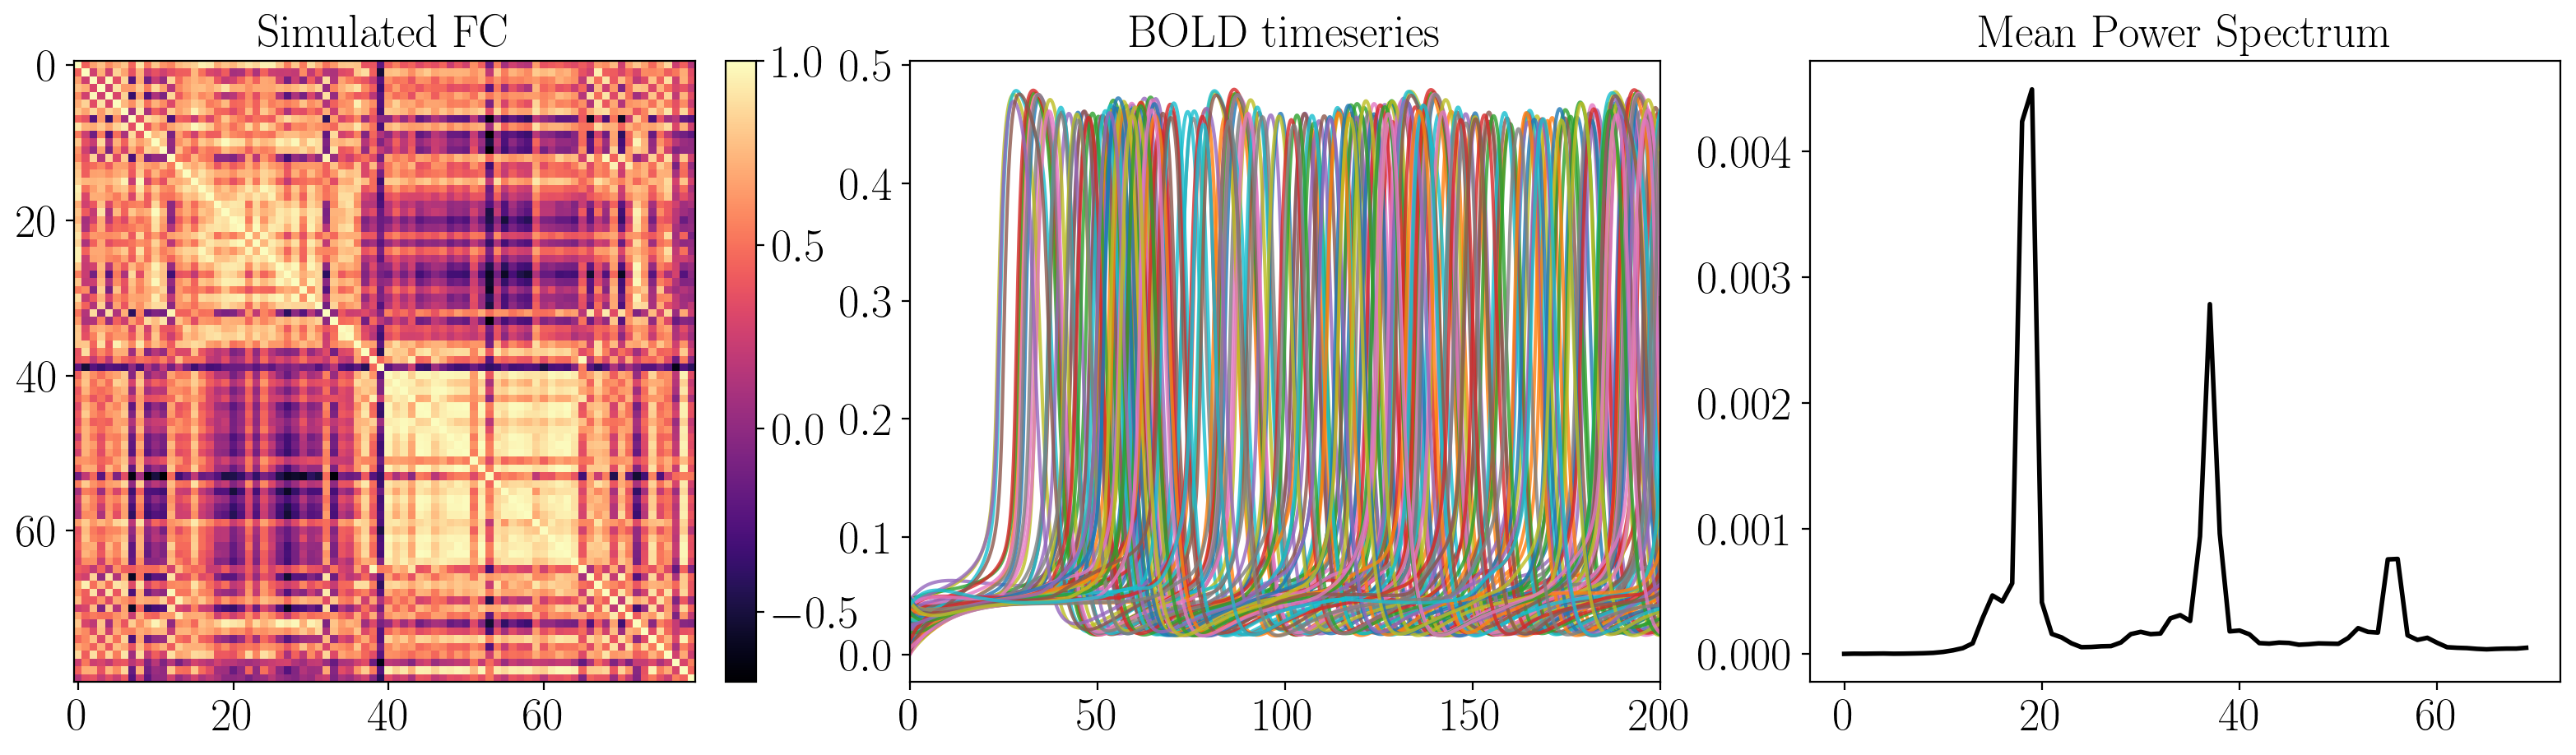

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
im = axs[0].imshow(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10*1000]))
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
axs[0].set_title("Simulated FC", fontsize=20)
axs[1].plot(wc.t, wc.exc[:, :].T, alpha=0.8)
axs[1].set_xlim(0, 200)
axs[1].set_title("BOLD timeseries", fontsize=20)
axs[2].set_title("Mean Power Spectrum", fontsize=20)
fr, pw = func.getMeanPowerSpectrum(wc.exc, wc.params["dt"])
axs[2].plot(fr, pw, c='k', lw = 2)

Text(0.5, 1.0, 'Simulated FC')

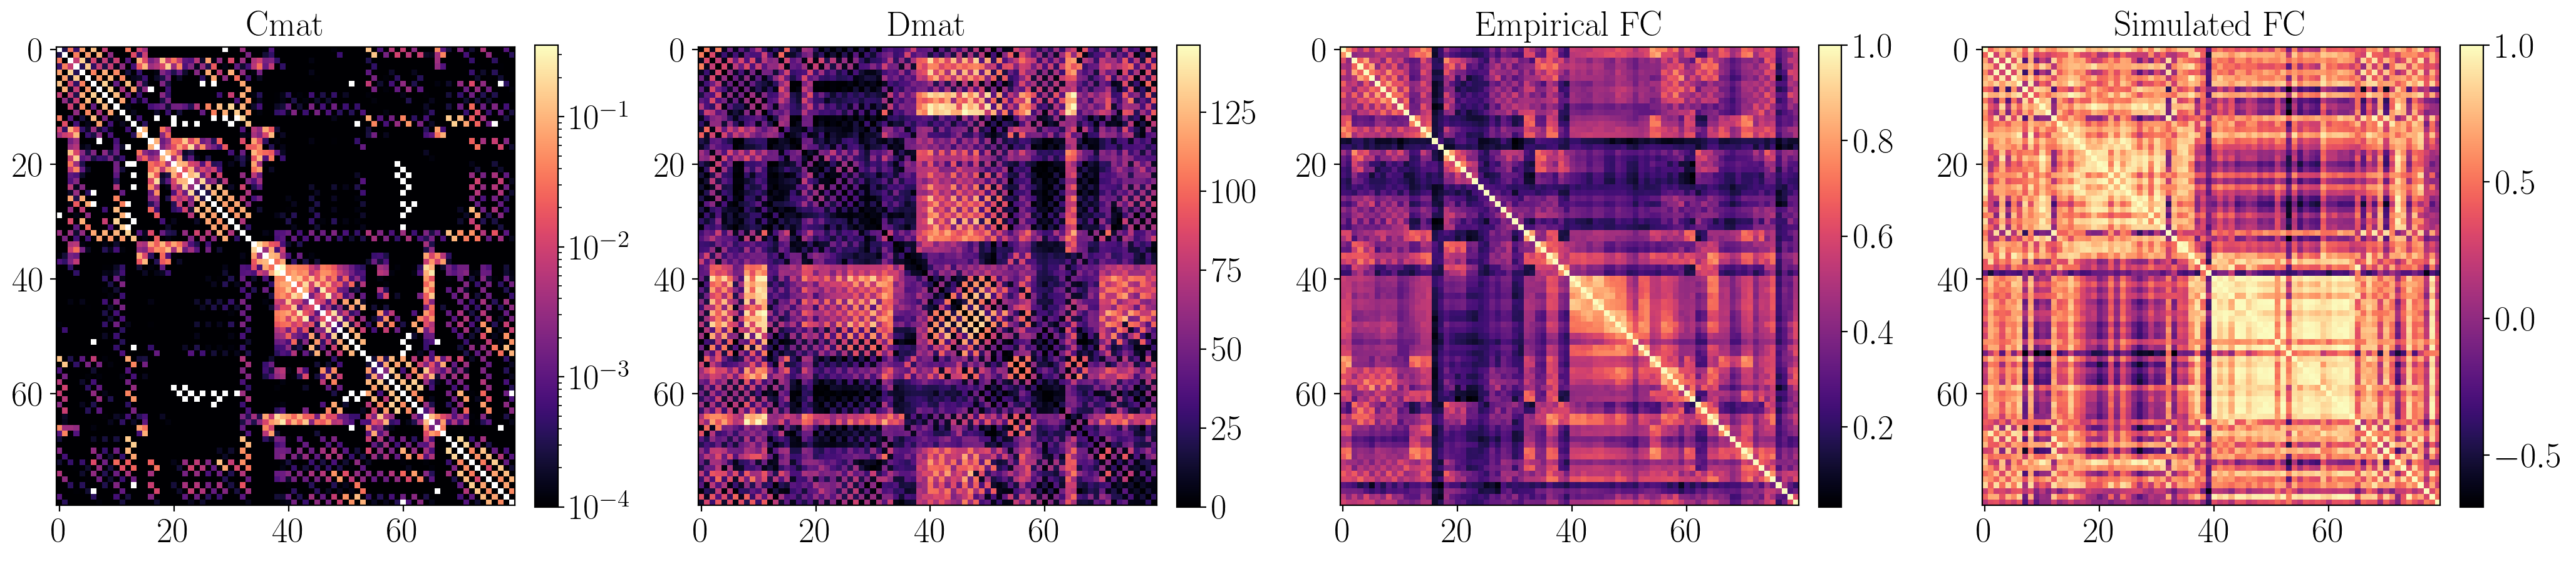

In [110]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1, 4, figsize=(25,20))
fig.subplots_adjust(wspace=0.28)


im = axs[0].imshow(wc.params['Cmat'], norm=LogNorm(vmin=10e-5, vmax=np.max(wc.params['Cmat'])))
axs[0].set_title("Cmat", fontsize = 20)
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
im = axs[1].imshow(wc.params['lengthMat'], cmap='magma')
axs[1].set_title("Dmat", fontsize = 20)
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04)
im = axs[2].imshow(FCs, cmap='magma')
axs[2].set_title("Empirical FC", fontsize = 20)
fig.colorbar(im, ax=axs[2],fraction=0.046, pad=0.04)
im = axs[3].imshow(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10*1000]))
fig.colorbar(im, ax=axs[3],fraction=0.046, pad=0.04)
axs[3].set_title("Simulated FC", fontsize=20)

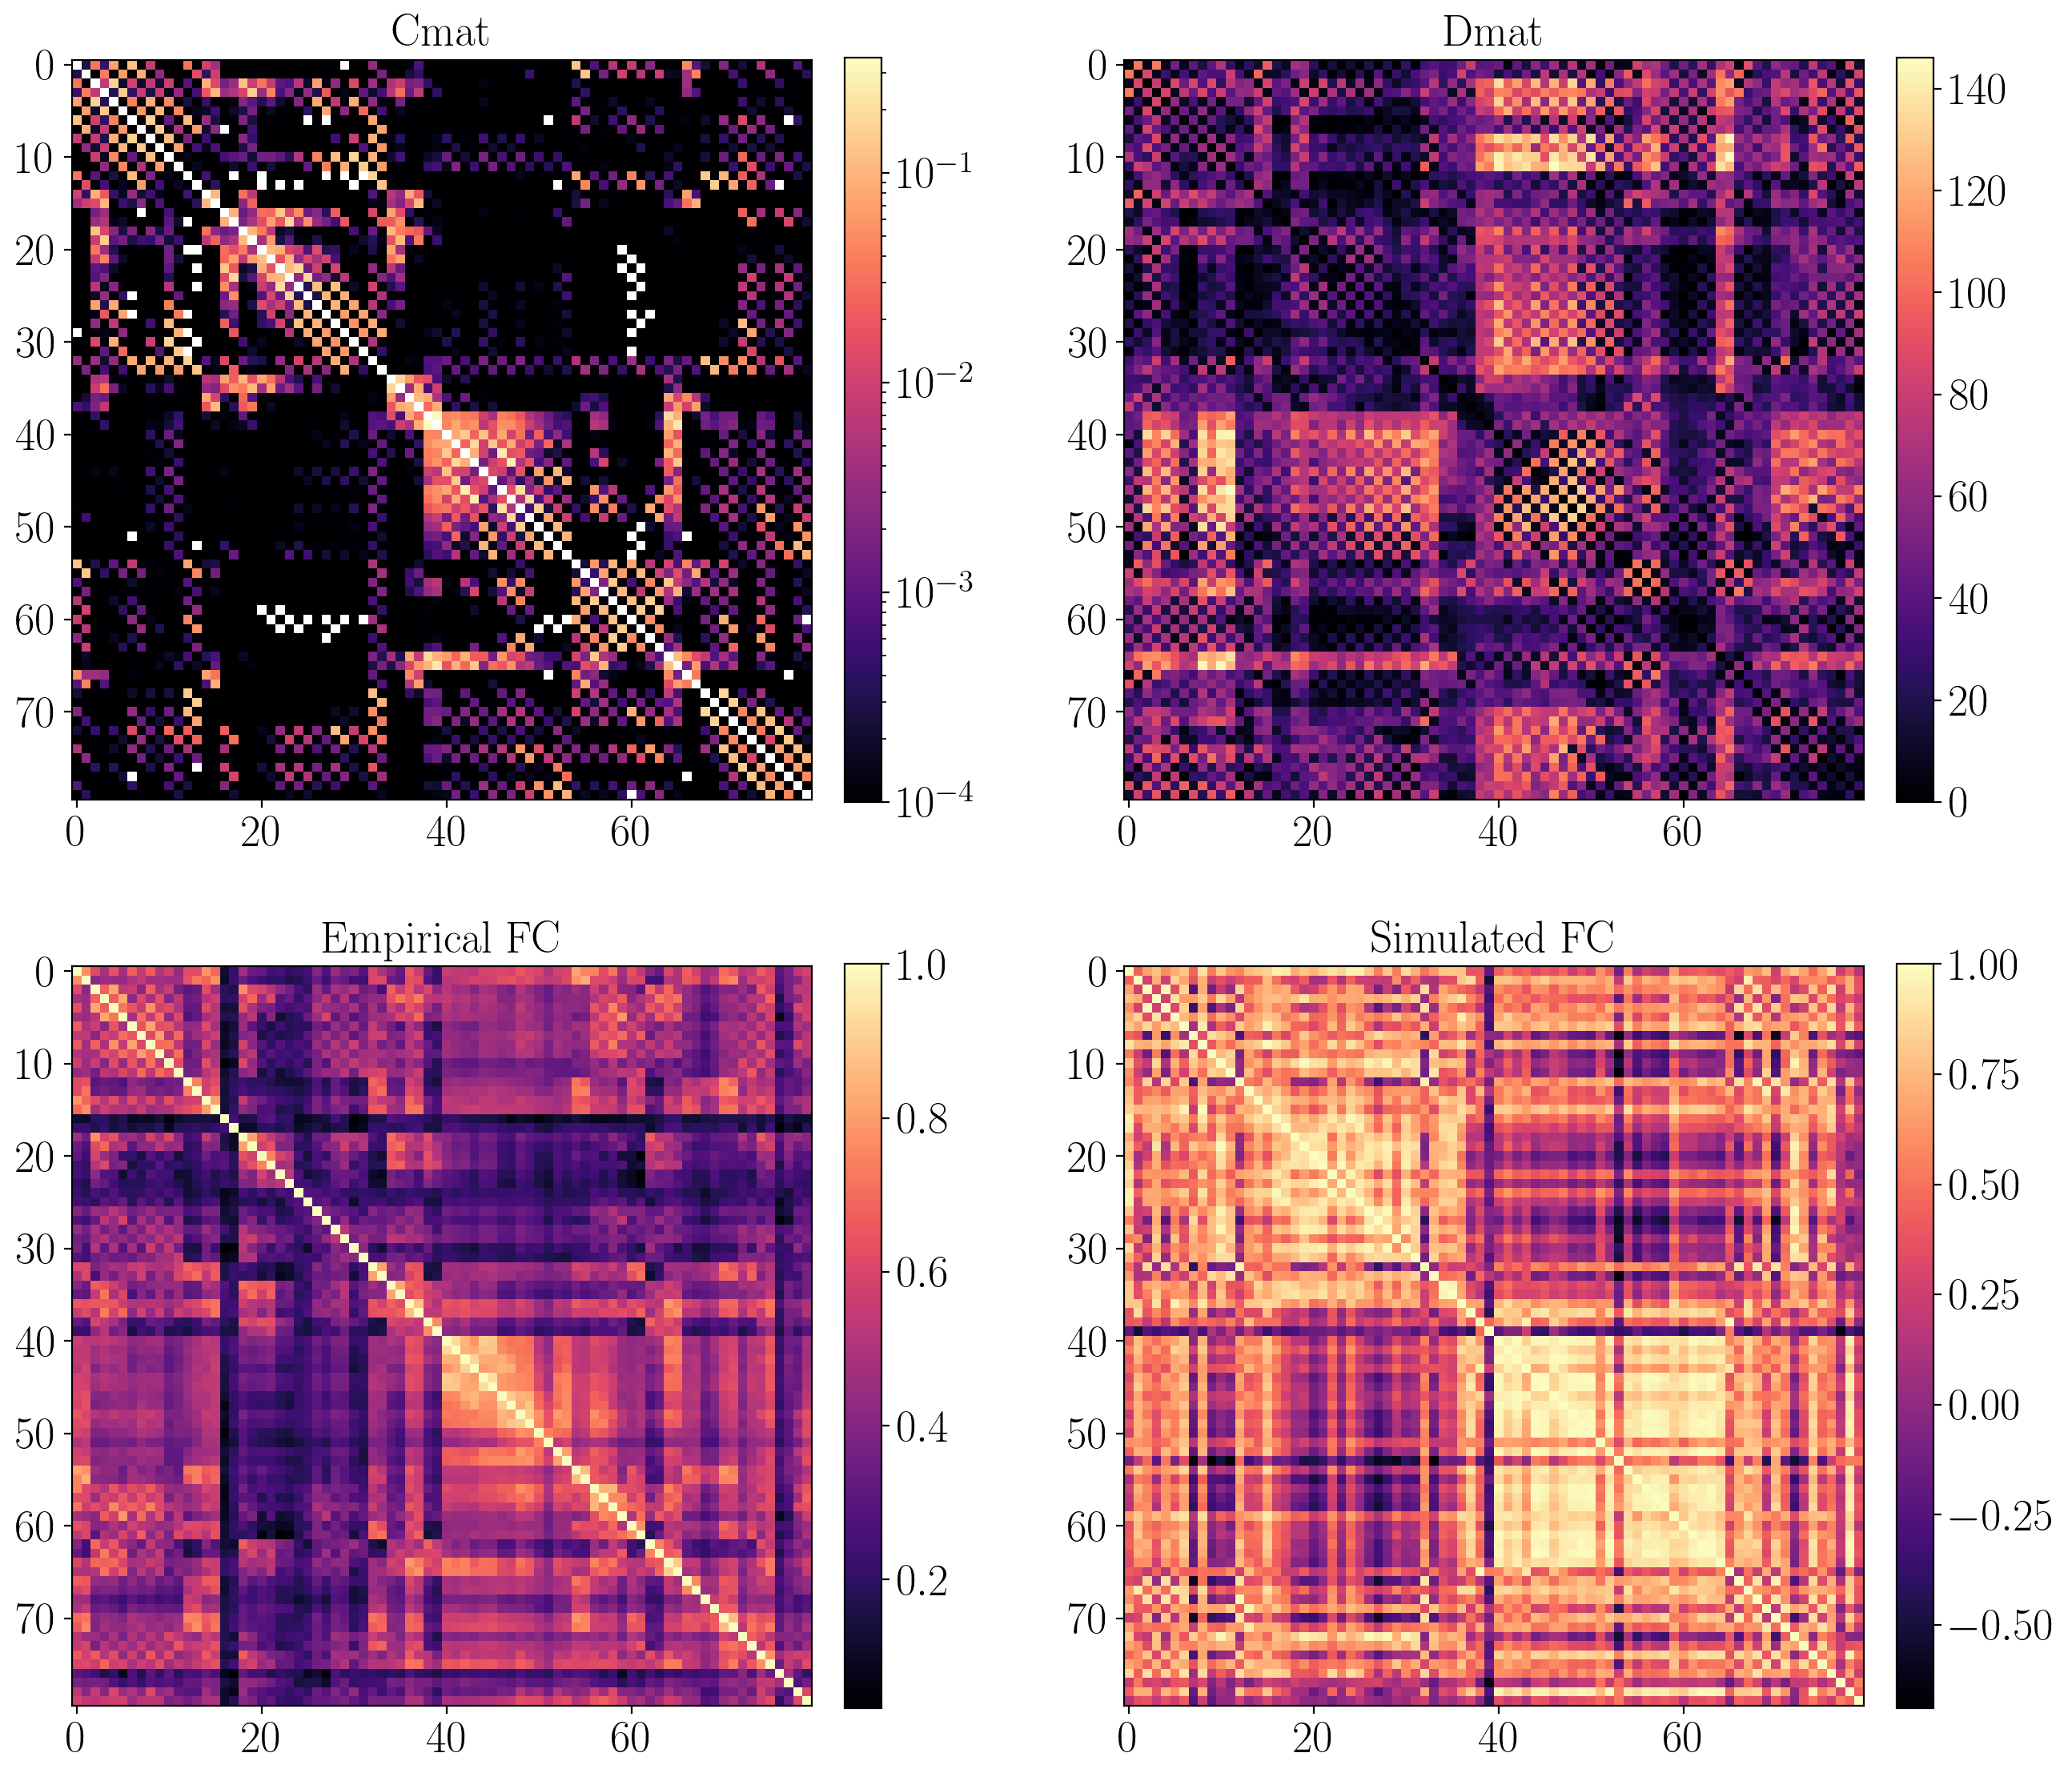

In [114]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.set_facecolor('w') 

im = axs[0,0].imshow(wc.params['Cmat'], norm=LogNorm(vmin=10e-5, vmax=np.max(wc.params['Cmat'])))
axs[0,0].set_title("Cmat", fontsize = 20)
fig.colorbar(im, ax=axs[0,0],fraction=0.046, pad=0.04)
im = axs[0,1].imshow(wc.params['lengthMat'], cmap='magma')
axs[0,1].set_title("Dmat", fontsize = 20)
fig.colorbar(im, ax=axs[0,1],fraction=0.046, pad=0.04)
im = axs[1,0].imshow(FCs, cmap='magma')
axs[1,0].set_title("Empirical FC", fontsize = 20)
fig.colorbar(im, ax=axs[1,0],fraction=0.046, pad=0.04)
im = axs[1,1].imshow(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10*1000]))
fig.colorbar(im, ax=axs[1,1],fraction=0.046, pad=0.04)
axs[1,1].set_title("Simulated FC", fontsize=20)
fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0)

In [111]:
scores = [func.matrix_correlation(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]), FCs)]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

Correlation per subject: ['0.28']
Mean FC/FC correlation: 0.28


In [112]:
gbc_data = np.mean(FCs)
print(gbc_data)

0.4226733816011318


In [113]:
gbc_model = np.mean(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]))
print(gbc_model)

0.4570170346170352
